## Lab 02 - Pandas and Data Visualization - 07 February, 2023
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do! Note that the practice problems will be checked when submitted!

### Pre-requisites

In [1]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file. 

#### `cookies.csv` file

The `cookies.csv` file contains information about cookies that were made from a single Rico's Bisquito's factory. There are, however, a few differences from the classes defined in homework0.

Here, this dataset shows all the cookies made from a single factory, where now the `cost_to_make` may not be the same for a single cookie because someone may have, for example, added too much flour. 

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [2]:
#TODO: import pandas and matplotlib in this cell
import pandas as pd
import matplotlib

We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [3]:
#TODO: read the cookies.csv file into a pandas dataframe
df = pd.read_csv("cookies.csv")

What is the DataFrame used? Well, Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [4]:
#TODO: print the head of the dataframe
print(df.head(n=10))

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
2  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
3  bad berry bunny           ["flour","blueberries","sugar","butter"]   
4     orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
5      minty miami          ["flour","mint extract","sugar","butter"]   
6        chocolate       ["flour","chocolate chips","sugar","butter"]   
7     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
8         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
9  red velvet rauw  ["flour","cocoa powder","butter","red food col...   

   calories  radius  cost_to_make  
0       170   3.102          0.67  
1       224   4.069          1.04  
2       198   3.780          1.07  
3       191   4.148          1.39  
4       162   3.

### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [5]:
#TODO: check the data types of the columns
df.dtypes

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object

### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set. 

In [6]:
# get rid of the row entirely if the `cost_to_make` field is not set
indexInvalidCost = df[df['cost_to_make'].isnull()].index
df.drop(indexInvalidCost, inplace=True)

# # replace the missing data with the mean of the column
# df.fillna(value=df['cost_to_make'].mean()) 

# print the head again to make sure 
# the changes took effect
print(df.head(n = 10))

             cookie                                        ingredients  \
0      laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1          nevadito  ["flour","chocolate chips","milk","vanilla ext...   
2   red velvet rauw  ["flour","cocoa powder","butter","red food col...   
3   bad berry bunny           ["flour","blueberries","sugar","butter"]   
4      orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
5       minty miami          ["flour","mint extract","sugar","butter"]   
6         chocolate       ["flour","chocolate chips","sugar","butter"]   
8          nevadito  ["flour","chocolate chips","milk","vanilla ext...   
9   red velvet rauw  ["flour","cocoa powder","butter","red food col...   
10  bad berry bunny           ["flour","blueberries","sugar","butter"]   

    calories  radius  cost_to_make  
0        170   3.102          0.67  
1        224   4.069          1.04  
2        198   3.780          1.07  
3        191   4.148          1.39  


To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [7]:
#TODO: use the isnull method to make sure your data is clean
print('Invalid cookie:', df['cookie'].isnull().sum())
print('Invalid ingredients:', df['ingredients'].isnull().sum())
print('Invalid calories:', df['calories'].isnull().sum())
print('Invalid radius:', df['radius'].isnull().sum())
print('Invalid cost_to_make:', df['cost_to_make'].isnull().sum())

df.isnull().values.any()

Invalid cookie: 0
Invalid ingredients: 0
Invalid calories: 0
Invalid radius: 0
Invalid cost_to_make: 0


False

### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [8]:
#TODO: see what cookies are in the dataset
print(df['cookie'].unique())

['laddoo lemon' 'nevadito' 'red velvet rauw' 'bad berry bunny'
 'orange ozuna' 'minty miami' 'chocolate']


We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [9]:
#TODO: use value_counts() to see how many 
# cookies of each type there are
print(df['cookie'].value_counts())

red velvet rauw    17
orange ozuna       16
nevadito           15
bad berry bunny    15
minty miami        15
laddoo lemon       13
chocolate          12
Name: cookie, dtype: int64


Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [10]:
#TODO: change bad berry bunny data elements to "bbb"
df['cookie'].str.replace("bad berry bunny", "bbb")

0         laddoo lemon
1             nevadito
2      red velvet rauw
3                  bbb
4         orange ozuna
            ...       
113          chocolate
114       laddoo lemon
115           nevadito
116    red velvet rauw
117                bbb
Name: cookie, Length: 103, dtype: object

We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [11]:
#TODO: adjust orange ozuna as described
df['cookie'].str.replace(" ", "_")

0         laddoo_lemon
1             nevadito
2      red_velvet_rauw
3      bad_berry_bunny
4         orange_ozuna
            ...       
113          chocolate
114       laddoo_lemon
115           nevadito
116    red_velvet_rauw
117    bad_berry_bunny
Name: cookie, Length: 103, dtype: object

We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [12]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name

# df['cookie'].str.extract(r'^([a-zA-Z]+)', expand=False)
df['cookie'].str.replace(" ", "_").str.split('_').str[0]


0         laddoo
1       nevadito
2            red
3            bad
4         orange
         ...    
113    chocolate
114       laddoo
115     nevadito
116          red
117          bad
Name: cookie, Length: 103, dtype: object

Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values, similar to how in the homework there is a `price_adjustments`. We can do this by using the `apply()` function on the `cost_to_make` column.

In [13]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.
df['cost_to_make'].apply(adjust_cost)

0      1.17
1      1.54
2      1.57
3      1.89
4      1.65
       ... 
113    1.92
114    2.50
115    2.11
116    1.83
117    1.86
Name: cost_to_make, Length: 103, dtype: float64

And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [14]:
#TODO: group by cookie type
df.groupby(by = 'cookie').describe()

calories                                                       \
                   count        mean        std    min     25%    50%     75%   
cookie                                                                          
bad berry bunny     15.0  188.466667  12.158869  171.0  182.50  185.0  196.00   
chocolate           12.0  221.416667  16.256234  197.0  208.25  224.0  231.75   
laddoo lemon        13.0  174.384615  10.851563  161.0  167.00  170.0  180.00   
minty miami         15.0  186.266667  12.617826  168.0  178.00  183.0  196.00   
nevadito            15.0  222.400000  14.544513  205.0  211.00  219.0  229.50   
orange ozuna        16.0  167.250000  13.428825  153.0  158.00  161.5  179.25   
red velvet rauw     17.0  200.176471   6.207206  191.0  196.00  198.0  204.00   

                       radius            ...                 cost_to_make  \
                   max  count      mean  ...      75%    max        count   
cookie                                   ...                                
bad berry bunny  213.0   15.0  3.914867  ...  4.06700  4.281         15.0   
chocolate        243.0   12.0  4.062833  ...  4.24475  4.474         12.0   
laddoo lemon     195.0   13.0  3.849000  ...  4.12300  4.562         13.0   
minty miami      209.0   15.0  3.714467  ...  3.96400  4.388         15.0   
nevadito         253.0   15.0  3.959000  ...  4.10500  4.346         15.0   
orange ozuna     198.0   16.0  3.506125  ...  3.77225  4.573         16.0   
red velvet rauw  211.0   17.0  4.106471  ...  4.31900  4.930         17.0   

                                                                        
                     mean       std   min     25%    50%     75%   max  
cookie                                                                  
bad berry bunny  1.152667  0.372203  0.67  0.8700  1.090  1.3750  2.01  
chocolate        1.210833  0.240849  0.86  1.0975  1.160  1.3600  1.67  
laddoo lemon     1.303077  0.580465  0.62  0.7200  1.270  1.8600  2.27  
minty miami      0.938000  0.292384  0.59  0.7450  0.840  1.0900  1.65  
nevadito         1.364667  0.336831  0.96  1.1450  1.280  1.5150  2.21  
orange ozuna     1.216250  0.424152  0.60  0.9550  1.165  1.5175  2.09  
red velvet rauw  1.171765  0.336364  0.73  0.9100  1.160  1.3300  1.94  

[7 rows x 24 columns]

We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [15]:
#TODO: group by cookie type and ingredients
df.groupby(by = ['cookie', 'ingredients']).describe()


calories  \
                                                                      count   
cookie          ingredients                                                   
bad berry bunny ["flour","blueberries","sugar","butter"]               15.0   
chocolate       ["flour","chocolate chips","sugar","butter"]           12.0   
laddoo lemon    ["flour","lemon juice","sugar","ghee"]                 13.0   
minty miami     ["flour","mint extract","sugar","butter"]              15.0   
nevadito        ["flour","chocolate chips","milk","vanilla extr...     15.0   
orange ozuna    ["flour","orange juice","sugar","vegetable oil"]       16.0   
red velvet rauw ["flour","cocoa powder","butter","red food colo...     17.0   

                                                                                \
                                                                          mean   
cookie          ingredients                                                      
bad berry bunny ["flour","blueberries","sugar","butter"]            188.466667   
chocolate       ["flour","chocolate chips","sugar","butter"]        221.416667   
laddoo lemon    ["flour","lemon juice","sugar","ghee"]              174.384615   
minty miami     ["flour","mint extract","sugar","butter"]           186.266667   
nevadito        ["flour","chocolate chips","milk","vanilla extr...  222.400000   
orange ozuna    ["flour","orange juice","sugar","vegetable oil"]    167.250000   
red velvet rauw ["flour","cocoa powder","butter","red food colo...  200.176471   

                                                                               \
                                                                          std   
cookie          ingredients                                                     
bad berry bunny ["flour","blueberries","sugar","butter"]            12.158869   
chocolate       ["flour","chocolate chips","sugar","butter"]        16.256234   
laddoo lemon    ["flour","lemon juice","sugar","ghee"]              10.851563   
minty miami     ["flour","mint extract","sugar","butter"]           12.617826   
nevadito        ["flour","chocolate chips","milk","vanilla extr...  14.544513   
orange ozuna    ["flour","orange juice","sugar","vegetable oil"]    13.428825   
red velvet rauw ["flour","cocoa powder","butter","red food colo...   6.207206   

                                                                           \
                                                                      min   
cookie          ingredients                                                 
bad berry bunny ["flour","blueberries","sugar","butter"]            171.0   
chocolate       ["flour","chocolate chips","sugar","butter"]        197.0   
laddoo lemon    ["flour","lemon juice","sugar","ghee"]              161.0   
minty miami     ["flour","mint extract","sugar","butter"]           168.0   
nevadito        ["flour","chocolate chips","milk","vanilla extr...  205.0   
orange ozuna    ["flour","orange juice","sugar","vegetable oil"]    153.0   
red velvet rauw ["flour","cocoa powder","butter","red food colo...  191.0   

                                                                            \
                                                                       25%   
cookie          ingredients                                                  
bad berry bunny ["flour","blueberries","sugar","butter"]            182.50   
chocolate       ["flour","chocolate chips","sugar","butter"]        208.25   
laddoo lemon    ["flour","lemon juice","sugar","ghee"]              167.00   
minty miami     ["flour","mint extract","sugar","butter"]           178.00   
nevadito        ["flour","chocolate chips","milk","vanilla extr...  211.00   
orange ozuna    ["flour","orange juice","sugar","vegetable oil"]    158.00   
red velvet rauw ["flour","cocoa powder","butter","red food colo...  196.00   

                                                                           \
               

We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [16]:
#TODO: filter using the boolean expression
df[df['radius'] > 4.3]

,cookie,ingredients,calories,radius,cost_to_make
22,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.18
23,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",204,4.667,1.40
39,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",174,4.388,0.64
41,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",195,4.562,0.62
52,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",186,4.573,1.06
54,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",206,4.328,1.34
64,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",196,4.425,0.87
68,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",206,4.319,1.24
72,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",197,4.461,1.67
79,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",199,4.474,1.14


We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [17]:
#TODO: filter the data using the boolean expression
# then group by cookie column
df[df['radius'] > 4.3].groupby(by = 'cookie').describe()

calories                                                     \
                   count        mean        std    min    25%    50%    75%   
cookie                                                                        
chocolate            3.0  200.666667   4.725816  197.0  198.0  199.0  202.5   
laddoo lemon         3.0  180.000000  14.106736  167.0  172.5  178.0  186.5   
minty miami          1.0  174.000000        NaN  174.0  174.0  174.0  174.0   
nevadito             1.0  219.000000        NaN  219.0  219.0  219.0  219.0   
orange ozuna         1.0  186.000000        NaN  186.0  186.0  186.0  186.0   
red velvet rauw      5.0  199.000000   6.082763  191.0  196.0  198.0  204.0   

                       radius          ...                cost_to_make  \
                   max  count    mean  ...     75%    max        count   
cookie                                 ...                               
chocolate        206.0    3.0  4.4210  ...  4.4675  4.474          3.0   
laddoo lemon     195.0    3.0  4.4940  ...  4.5405  4.562          3.0   
minty miami      174.0    1.0  4.3880  ...  4.3880  4.388          1.0   
nevadito         219.0    1.0  4.3460  ...  4.3460  4.346          1.0   
orange ozuna     186.0    1.0  4.5730  ...  4.5730  4.573          1.0   
red velvet rauw  206.0    5.0  4.5632  ...  4.6670  4.930          5.0   

                                                                    
                     mean       std   min   25%   50%    75%   max  
cookie                                                              
chocolate        1.383333  0.267644  1.14  1.24  1.34  1.505  1.67  
laddoo lemon     1.090000  0.415812  0.62  0.93  1.24  1.325  1.41  
minty miami      0.640000       NaN  0.64  0.64  0.64  0.640  0.64  
nevadito         1.180000       NaN  1.18  1.18  1.18  1.180  1.18  
orange ozuna     1.060000       NaN  1.06  1.06  1.06  1.060  1.06  
red velvet rauw  1.160000  0.204083  0.87  1.05  1.24  1.240  1.40  

[6 rows x 24 columns]

We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [18]:
#TODO: add a column to the dataframe that is the
# calories per radius

# df['calories_per_radius'] = df['calories'] / df['radius']
df['calories_per_radius'] = df.apply(lambda x: x['calories'] / x['radius'], axis=1)
df.head(10)

,cookie,ingredients,calories,radius,cost_to_make,calories_per_radius
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67,54.803353
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,55.050381
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07,52.380952
3,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39,46.046287
4,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15,49.984573
5,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.84,51.463169
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.17,65.960912
8,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.28,56.133056
9,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,0.76,53.553299
10,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",183,3.874,1.07,47.237997


Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [19]:
#TODO: drop the created column
df.drop(columns=["ingredients"])

,cookie,calories,radius,cost_to_make,calories_per_radius
0,laddoo lemon,170,3.102,0.67,54.803353
1,nevadito,224,4.069,1.04,55.050381
2,red velvet rauw,198,3.780,1.07,52.380952
3,bad berry bunny,191,4.148,1.39,46.046287
4,orange ozuna,162,3.241,1.15,49.984573
...,...,...,...,...,...
113,chocolate,227,4.085,1.42,55.569155
114,laddoo lemon,170,3.916,2.00,43.411645
115,nevadito,211,3.915,1.61,53.895275
116,red velvet rauw,197,3.906,1.33,50.435228


### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

<AxesSubplot: xlabel='radius', ylabel='cost_to_make'>

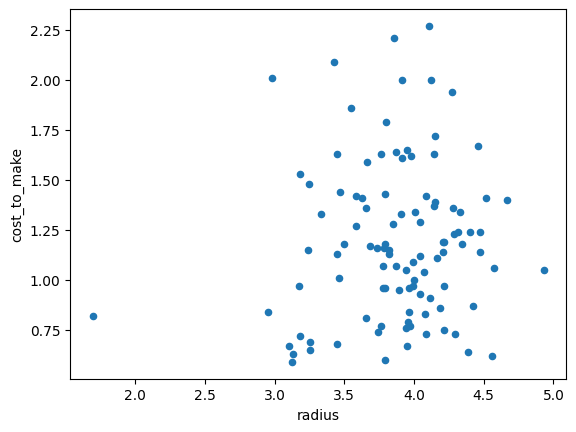

In [20]:
#TODO: plot the radius (x) versus cost to make (y)
df.plot.scatter(x='radius', y='cost_to_make')

We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

<AxesSubplot: title={'center': 'radius'}, xlabel='cookie'>

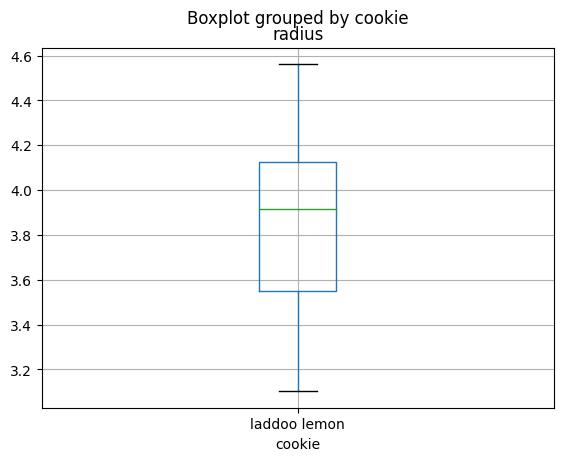

In [21]:
#TODO: add the described boxplot
df[df['cookie']=="laddoo lemon"].boxplot(column="radius", by="cookie")

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

<AxesSubplot: ylabel='Frequency'>

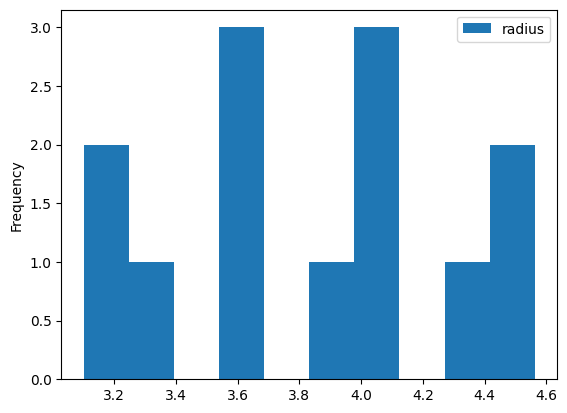

In [22]:
#TODO: add the described histogram
df[df['cookie'] == "laddoo lemon"].plot.hist(y='radius')

Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

radius    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

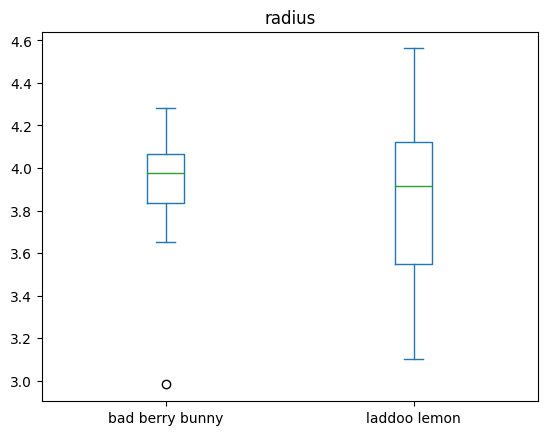

In [23]:
#TODO: analyze the two cookie's radius in a boxplot

# df.boxplot(column="radius", by="cookie")
df[df['cookie'].isin(["bad berry bunny", "laddoo lemon"])].plot.box(column="radius", by='cookie')

### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [24]:
#Add your code here

df.shape[0] # rows count

103

#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [25]:
#Add your code here
df['is_large'] = df['radius'].apply(lambda r: r > 4)

df.head()

,cookie,ingredients,calories,radius,cost_to_make,calories_per_radius,is_large
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67,54.803353,False
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,55.050381,True
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07,52.380952,False
3,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39,46.046287,True
4,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15,49.984573,False


#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [26]:
#Add your code here
df['avg_radius'] = df.groupby('cookie')['radius'].transform('mean')
df.head(10)

,cookie,ingredients,calories,radius,cost_to_make,calories_per_radius,is_large,avg_radius
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67,54.803353,False,3.849000
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,55.050381,True,3.959000
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07,52.380952,False,4.106471
3,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39,46.046287,True,3.914867
4,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15,49.984573,False,3.506125
5,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.84,51.463169,False,3.714467
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.17,65.960912,False,4.062833
8,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.28,56.133056,False,3.959000
9,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,0.76,53.553299,False,4.106471
10,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",183,3.874,1.07,47.237997,False,3.914867


#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [27]:
#Add your code here
chocolate_chips_df = df[df['ingredients'].str.contains('chocolate chips')]
chocolate_chips_df.head(10)

,cookie,ingredients,calories,radius,cost_to_make,calories_per_radius,is_large,avg_radius
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04,55.050381,True,3.959000
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.17,65.960912,False,4.062833
8,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.28,56.133056,False,3.959000
13,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,1.53,65.681961,False,4.062833
15,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",236,4.043,1.29,58.372496,True,3.959000
22,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.18,50.391164,True,3.959000
28,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",211,4.152,1.72,50.818882,True,3.959000
35,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",205,3.776,0.96,54.290254,False,3.959000
40,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",240,4.212,0.97,56.980057,True,4.062833
42,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",220,3.855,2.21,57.068742,False,3.959000


#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

cost_to_make    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

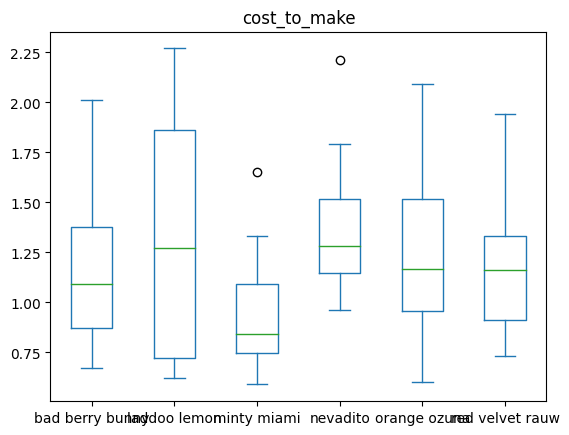

In [28]:
#Add your code here
df[df['cookie'] != 'chocolate'].plot.box(column="cost_to_make", by='cookie')

#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

<AxesSubplot: ylabel='Frequency'>

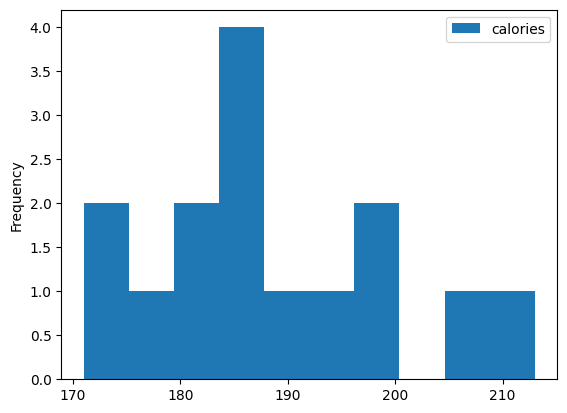

In [29]:
#Add your code here
df[df['cookie'] == "bad berry bunny"].plot.hist(y='calories')